In [119]:
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.ensemble import RandomForestClassifier
import pylab as pyl
from matplotlib import style

In [120]:
data_file = pd.read_csv(('C:\\Users\\Pratik\\Desktop\\Python Data\\Data for Final Project\\Crime_Report_Chicago.csv'), parse_dates=['Date'], index_col='Date')
df = data_file.head()
df

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 21:00:00,10508593,HZ250410,042XX W MADISON ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,1115,...,28,26,18,1148220.0,1899677.0,2016,5/10/2016 15:56,41.880658,-87.731212,"(41.880658176, -87.731212135)"
2016-05-03 21:35:00,10508594,HZ250385,065XX S KEDVALE AVE,810,THEFT,OVER $500,APARTMENT,False,True,833,...,13,65,6,1149830.0,1860872.0,2016,5/10/2016 15:56,41.774141,-87.726307,"(41.77414081, -87.726307093)"
2016-05-03 14:45:00,10508595,HZ250362,045XX S DAMEN AVE,560,ASSAULT,SIMPLE,STREET,False,True,924,...,12,61,08A,1163662.0,1874660.0,2016,5/10/2016 15:56,41.811698,-87.675214,"(41.811697721, -87.675214316)"
2016-05-03 18:42:00,10508597,HZ250202,063XX S CLAREMONT AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,825,...,15,66,08B,1161829.0,1862607.0,2016,5/10/2016 15:56,41.778661,-87.682273,"(41.778661058, -87.68227253)"
2016-05-03 15:00:00,10508598,HZ250298,070XX S INDIANA AVE,320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,322,...,6,69,3,1178808.0,1858478.0,2016,5/10/2016 15:56,41.766961,-87.620152,"(41.766961034, -87.620152116)"


In [121]:
data_file['DayOfWeek'] = data_file.index.dayofweek
data_file['Hour'] = data_file.index.hour
data_file['Month'] = data_file.index.month
data_file['Year'] = data_file.index.year
data_file['DayOfMonth'] = data_file.index.day
data_file['Month'].head()

Date
2016-05-03 21:00:00    5
2016-05-03 21:35:00    5
2016-05-03 14:45:00    5
2016-05-03 18:42:00    5
2016-05-03 15:00:00    5
Name: Month, dtype: int32

In [122]:
pyl.rcParams['figure.figsize'] = (16.0, 8.0)

months_indxs = data_file.groupby('Month').size().keys() - 1
lst_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
actvts_monthly = data_file.groupby('Month').size().get_values()
actvts_monthly

array([20341, 18583, 21877, 20951, 23312, 23767, 24560, 24485, 23183,
       23259, 20974, 15712], dtype=int64)

In [123]:
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(months_indxs, actvts_monthly, 'ro-', linewidth = 4)

ax1.set_title ('All Criminal Activities', fontsize = 25)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 2))
ax1.set_xticklabels(lst_of_months)

In [124]:
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

In [125]:
Burglary = data_file[data_file['Primary Type'] == 'BURGLARY']
Battery = data_file[data_file['Primary Type'] == 'BATTERY']
Weapons_Violation = data_file[data_file['Primary Type'] == 'WEAPONS VIOLATION']
Sex_Offence = data_file[data_file['Primary Type'] == 'SEX OFFENCE']
Public_Peace_Violation = data_file[data_file['Primary Type'] == 'PUBLIC PEACE VIOLATION']
Motor_Vehicle_Theft = data_file[data_file['Primary Type'] == 'MOTOR VEHICLE THEFT']

In [126]:
ax2 = plt.subplot2grid((3,3), (1,0), colspan = 4, rowspan = 3)
y = np.empty([8,12])

In [127]:
y[0] = Burglary.groupby('Month').size().get_values()
y[1] = Battery.groupby('Month').size().get_values()
y[2] = Weapons_Violation.groupby('Month').size().get_values()
#y[3] = Sex_Offence.groupby('Month').size().get_values()
y[4] = Public_Peace_Violation.groupby('Month').size().get_values()
y[5] = Motor_Vehicle_Theft.groupby('Month').size().get_values()

In [128]:
y[2]

array([ 192.,  214.,  289.,  283.,  342.,  346.,  303.,  319.,  327.,
        293.,  280.,  185.])

In [129]:
incidents = ['BURGLARY', 'BATTERY', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION']
color_sequence = ['#DEB887','#008B8B', '#00008B', '#2F4F4F']
g = [None]*4
for j in range(0,4):
    y[j]= (y[j]-min(y[j]))/(max(y[j])-min(y[j]))  # normalization
    g[j] = ax2.plot(months_indxs, y[j],'o-', color=color_sequence[j], lw=2)

In [130]:
ax2.set_ylabel("Monthly Crime Events, Featured")

ax2.xaxis.set_ticks(np.arange(start, end+2, 1))
ax2.set_xticklabels(lst_of_months)
ax2.legend((item[0] for item in g), incidents, bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

In [131]:
pyl.gcf().text(0.5, 1.00, 
            'Monthly Activities',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 10)

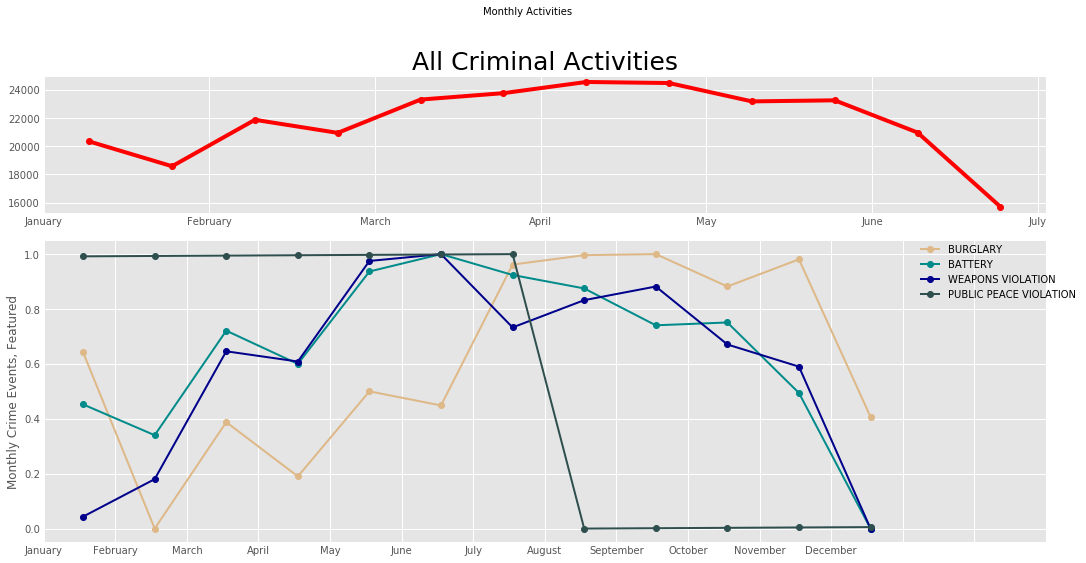

In [132]:
plt.show()